# Data Visualization Workshop Tutorial

# 顧客データを分析してみよう！

## 分析する前にどんなデータかをチェックしてみましょう

### データを読み込む

In [1]:
import pandas as pd
df = pd.read_csv('./DVWS_Customer_data_ver1.csv')
df.head()

,ID,Age,Sex,Address,Frequency
0,1900001,25,Male,Kyuusyuu,1
1,1900002,21,Female,Hokkaido,1
2,1900003,21,Female,Hokkaido,1
3,1900004,46,Female,Kyuusyuu,2
4,1900005,53,Male,Tyuugoku,4


### どんなデータなのか？

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 5 columns):
ID           1221 non-null int64
Age          1221 non-null int64
Sex          1221 non-null object
Address      1221 non-null object
Frequency    1221 non-null int64
dtypes: int64(3), object(2)
memory usage: 47.8+ KB


In [3]:
df.describe()

,ID,Age,Frequency
count,1.221000e+03,1221.000000,1221.000000
mean,1.900611e+06,36.699427,1.792793
std,3.526166e+02,12.645893,1.364832
min,1.900001e+06,21.000000,1.000000
25%,1.900306e+06,26.000000,1.000000
50%,1.900611e+06,34.000000,1.000000
75%,1.900916e+06,44.000000,2.000000
max,1.901221e+06,69.000000,12.000000


### 各行にどんなデータが入っているのでしょうか？

In [4]:
df['Sex'].value_counts()

Female    834
Male      387
Name: Sex, dtype: int64

In [5]:
df['Address'].value_counts()

Kanto       346
Kyuusyuu    241
Kinki       156
Tohoku      153
Hokkaido    101
Tyubu        83
Tyuugoku     73
Shikoku      68
Name: Address, dtype: int64

In [6]:
df['Frequency'].value_counts()

1     719
2     303
3      82
4      42
5      41
7      15
6      10
8       7
12      2
Name: Frequency, dtype: int64

## ユーザーの男女比を可視化してみよう！

In [7]:
df['Sex'].value_counts()

Female    834
Male      387
Name: Sex, dtype: int64

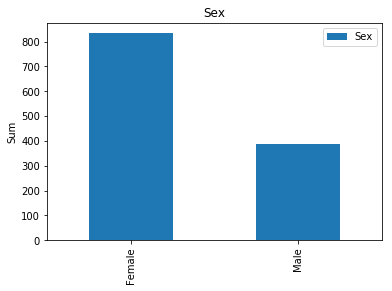

In [8]:
# 棒グラフ➀

import matplotlib.pyplot as plt
%matplotlib inline

df['Sex'].value_counts().plot.bar()
plt.title('Sex')
plt.ylabel('Sum')
plt.legend()

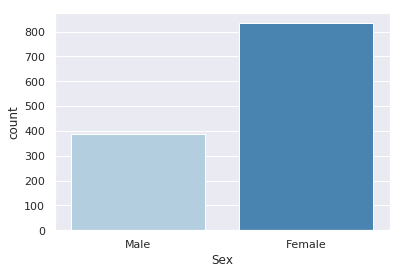

In [9]:
# 棒グラフ➁

import seaborn as sns
sns.set()

sns.countplot(df['Sex'], palette = 'Blues')

Text(0.5, 1.0, 'Sex')

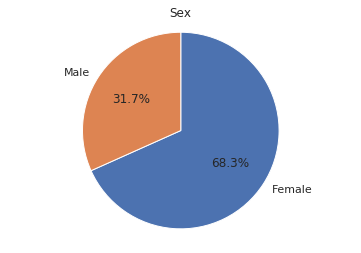

In [10]:
# 円グラフ（あんまりつかわないかも。）
x = [834, 387]
label = ['Female', 'Male']

plt.pie(x, labels = label, counterclock=False, startangle=90, autopct="%.1f%%" )
# 綺麗な円にならなかったら
plt.axis('equal')
plt.title('Sex')

## ワーク: どんな年齢層の人が多いだろう？

(array([258., 210., 211., 158.,  82., 104.,  44.,  58.,  51.,  45.]),
 array([21. , 25.8, 30.6, 35.4, 40.2, 45. , 49.8, 54.6, 59.4, 64.2, 69. ]),
 <a list of 10 Patch objects>)

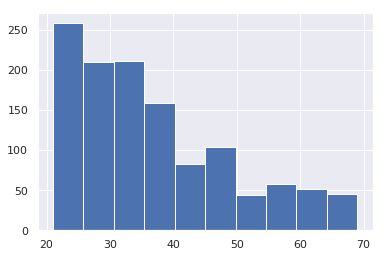

In [11]:
plt.hist(x = 'Age', data = df)

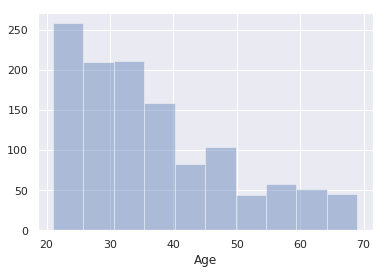

In [12]:
sns.distplot(df['Age'], bins = 10, kde = False)

## 年齢と性別の2軸で集計してみる。

In [13]:
# Ageを年代に直していく。
df['Ages'] = df['Age']//10*10

In [14]:
pd.pivot_table(df, index = 'Ages', columns = 'Sex', values = 'ID', aggfunc=len)

Sex,Female,Male
Ages,,
20,320,148
30,246,123
40,108,78
50,85,17
60,75,21


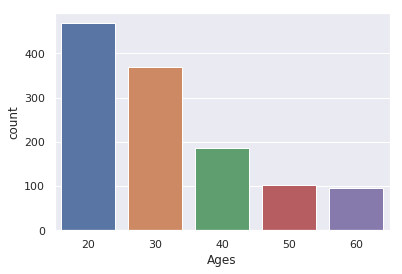

In [15]:
# 年代でいったん図を描いてみる
sns.countplot( x = 'Ages',data = df)

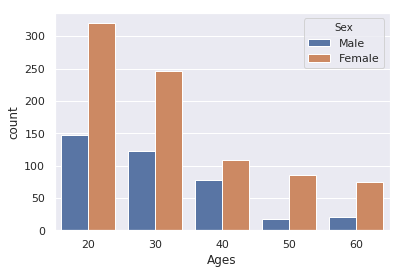

In [16]:
# 上のグラフを性別ごとにそれぞれ分けるイメージ。
sns.countplot( x = 'Ages',hue = 'Sex', data = df)

## ケース: リピートしている人としていない人とで、特徴はあるのだろうか？

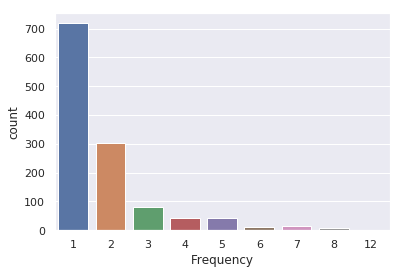

In [17]:
# Frequencyどんなもんか見てみる。
sns.countplot(df['Frequency'])

In [18]:
# リピートしているとしていない人を区別する新しい変数を作成する。(時間的に事前に作成？)
df['Repeater'] = 0
for i in range(len(df['Frequency'])):
    if df.iloc[i, 4] > 1:
        df.iloc[i, 6] = 1

In [19]:
# うまく出来ているかCheck!
df.head()

,ID,Age,Sex,Address,Frequency,Ages,Repeater
0,1900001,25,Male,Kyuusyuu,1,20,0
1,1900002,21,Female,Hokkaido,1,20,0
2,1900003,21,Female,Hokkaido,1,20,0
3,1900004,46,Female,Kyuusyuu,2,40,1
4,1900005,53,Male,Tyuugoku,4,50,1


In [20]:
# 文字列でも作っていいかも
df['Repeater_character'] = 'New'
for i in range(len(df['Frequency'])):
    if df.iloc[i, 4] > 1:
        df.iloc[i, 7] = 'Repeater'

In [21]:
df.head()

,ID,Age,Sex,Address,Frequency,Ages,Repeater,Repeater_character
0,1900001,25,Male,Kyuusyuu,1,20,0,New
1,1900002,21,Female,Hokkaido,1,20,0,New
2,1900003,21,Female,Hokkaido,1,20,0,New
3,1900004,46,Female,Kyuusyuu,2,40,1,Repeater
4,1900005,53,Male,Tyuugoku,4,50,1,Repeater


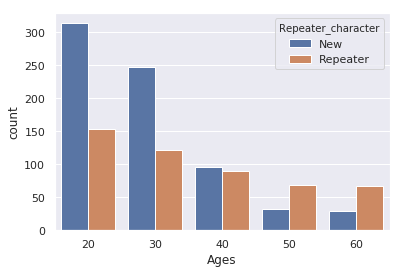

In [22]:
# 年齢ごとに差があるのかをチェックしてみよう
sns.countplot(x = 'Ages', hue = 'Repeater_character', data = df)

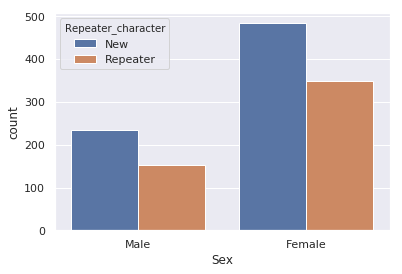

In [23]:
# 性別ごとに差があるのかをチェックしてみよう
sns.countplot(x = 'Sex', hue = 'Repeater_character', data = df)

In [24]:
# ３軸で集計することも出来る。aggfuncを指定しないと、平均値になる。marginsを使うと、小計が出てくる。
pd.pivot_table(df, index = ['Ages', 'Sex'], columns = 'Repeater_character', values = 'ID', aggfunc=len, margins = True)

Repeater_character    New  Repeater     All
Ages Sex                                   
20   Female         212.0     108.0   320.0
     Male           102.0      46.0   148.0
30   Female         167.0      79.0   246.0
     Male            80.0      43.0   123.0
40   Female          60.0      48.0   108.0
     Male            36.0      42.0    78.0
50   Female          27.0      58.0    85.0
     Male             6.0      11.0    17.0
60   Female          18.0      57.0    75.0
     Male            11.0      10.0    21.0
All                 719.0     502.0  1221.0

In [25]:
# 上の結果を新規、リピーターに分けて可視化してみる。
# まずはデータを抽出してみる。
df_New = df[df['Frequency'] == 1]
df_Repeat = df[df['Frequency'] > 1]

Text(0.5, 1.0, 'Repeater')

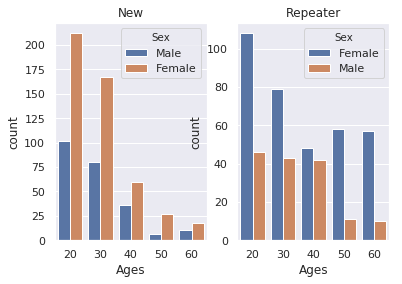

In [26]:
plt.subplot(1,2,1)
sns.countplot(x = 'Ages', hue = 'Sex', data = df_New)
plt.title('New')

plt.subplot(1,2,2)
sns.countplot(x = 'Ages', hue = 'Sex', data = df_Repeat)
plt.title('Repeater')


(0, 200)

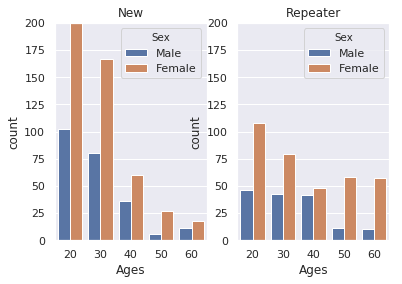

In [27]:
# これじゃあｙ軸がバラバラなので、上手く比較出来ない。また、Male とFeamaleといろが逆になっている。
plt.subplot(1,2,1)
sns.countplot(x = 'Ages', hue = 'Sex', hue_order=['Male', 'Female'] ,data = df_New)
plt.title('New')
plt.ylim(0, 200)

plt.subplot(1,2,2)
sns.countplot(x = 'Ages', hue = 'Sex', hue_order=['Male', 'Female'] , data = df_Repeat)
plt.title('Repeater')
plt.ylim(0, 200)